# Exploratory data analysis

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt
# fix random seed
np.random.seed(2019)

## Load DataSet

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from tqdm import tqdm


In [7]:
import cv2

In [16]:
path ='C:/Users/User/Desktop/objdetectionproj/Tumor/train/images'

In [17]:
data = [os.path.join(path,x) for x in os.listdir(path)]

In [18]:
images = [data[x] for x in range(len(data)) if data[x].endswith('.jpg')]
labels = [data[x] for x in range(len(data)) if data[x].endswith('.txt')]

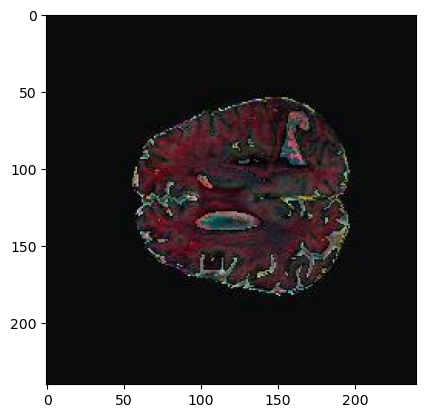

In [19]:
plt.imshow(cv2.cvtColor(cv2.imread(images[0]),cv2.COLOR_BGR2RGB))

## Data set -1  Indexing

In [9]:
df = pd.DataFrame(columns=['image_name','object','x_cen','y_cen','w','h'])
i=0
for id in tqdm(images):
    label = open(id[:-4]+'.txt','r') 
    a = label.read()
    label.close()
    label = a.split('\n')
    cleaned_label = label[:-1]
    
    for name in cleaned_label:
        ind_label = name.split(' ')
        df.loc[i,'image_name'] = id[58:]
        df.loc[i,'object'] = int(ind_label[0])
        df.loc[i,'x_cen'] = float(ind_label[1])
        df.loc[i,'y_cen'] = float(ind_label[2])
        df.loc[i,'w'] = float(ind_label[3])
        df.loc[i,'h'] = float(ind_label[4])
        i += 1

100%|██████████| 6930/6930 [03:44<00:00, 30.80it/s]


In [10]:
df.head()

,image_name,object,x_cen,y_cen,w,h
0,volume_100_slice_42_jpg.rf.aa9204d61a24f8d7c56...,0,0.489583,0.266667,0.0125,0.008333
1,volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...,0,0.489583,0.28125,0.054167,0.0625
2,volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...,1,0.579167,0.322917,0.216667,0.0875
3,volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...,0,0.4875,0.279167,0.091667,0.083333
4,volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...,1,0.58125,0.320833,0.229167,0.091667


## Data set -2  Indexing

In [11]:
column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
pascal_voc = pd.DataFrame(columns=column_name)
for i in tqdm(range(len(df))):
    
    pascal_voc.loc[i,'filename'] = df.loc[i,'image_name']
    pascal_voc.loc[i,'width'] = 240
    pascal_voc.loc[i,'height']= 240  
    if df.loc[i,'object'] == 0:    
        pascal_voc.loc[i,'class'] = 'Primary'
    elif df.loc[i,'object'] == 1:
        pascal_voc.loc[i,'class'] = '2nd Stage'
    else:
        pascal_voc.loc[i,'class'] = '3rd Stage'
    pascal_voc.loc[i,'xmin']  = int((df.loc[i,'x_cen'] - df.loc[i,'w']/2)*240)
    pascal_voc.loc[i,'ymin']  = int((df.loc[i,'y_cen'] - df.loc[i,'h']/2)*240)
    pascal_voc.loc[i,'xmax']  = int((df.loc[i,'x_cen'] + df.loc[i,'w']/2)*240)
    pascal_voc.loc[i,'ymax']  = int((df.loc[i,'y_cen'] + df.loc[i,'h']/2)*240) 

100%|██████████| 8366/8366 [00:28<00:00, 290.36it/s]


In [12]:
pascal_voc

,filename,width,height,class,xmin,ymin,xmax,ymax
0,volume_100_slice_42_jpg.rf.aa9204d61a24f8d7c56...,240,240,Primary,116,63,118,65
1,volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...,240,240,Primary,110,60,123,75
2,volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...,240,240,2nd Stage,113,67,165,88
3,volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...,240,240,Primary,106,57,128,77
4,volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...,240,240,2nd Stage,112,66,167,88
...,...,...,...,...,...,...,...,...
8361,volume_9_slice_76_jpg.rf.fe5584a13d08a7b1812fd...,240,240,Primary,94,69,158,106
8362,volume_9_slice_76_jpg.rf.fe5584a13d08a7b1812fd...,240,240,2nd Stage,91,55,200,118
8363,volume_9_slice_78_jpg.rf.a7b4f3ab8171e71999d49...,240,240,Primary,103,73,154,106
8364,volume_9_slice_78_jpg.rf.a7b4f3ab8171e71999d49...,240,240,2nd Stage,91,56,200,116


## Insert the 'id' column at the beginning of the DataFrame

In [13]:
import pandas as pd

id_values = list(range(1, len(df) + 1))

# Insert the 'id' column at the beginning of the DataFrame
df.insert(0, 'id', id_values)

# Display the updated DataFrame
print(df)


        id                                         image_name object  \
0        1  volume_100_slice_42_jpg.rf.aa9204d61a24f8d7c56...      0   
1        2  volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...      0   
2        3  volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...      1   
3        4  volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...      0   
4        5  volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...      1   
...    ...                                                ...    ...   
8361  8362  volume_9_slice_76_jpg.rf.fe5584a13d08a7b1812fd...      0   
8362  8363  volume_9_slice_76_jpg.rf.fe5584a13d08a7b1812fd...      1   
8363  8364  volume_9_slice_78_jpg.rf.a7b4f3ab8171e71999d49...      0   
8364  8365  volume_9_slice_78_jpg.rf.a7b4f3ab8171e71999d49...      1   
8365  8366  volume_9_slice_85_jpg.rf.abdc737ef44c21214789f...      1   

         x_cen     y_cen         w         h  
0     0.489583  0.266667    0.0125  0.008333  
1     0.489583   0.28125  0.054167    0.0

## Insert the 'id' column at the beginning of the DataFrame

In [14]:
id_values = list(range(1, len(pascal_voc) + 1))

pascal_voc.insert(0, 'id', id_values)

print(pascal_voc)


        id                                           filename width height  \
0        1  volume_100_slice_42_jpg.rf.aa9204d61a24f8d7c56...   240    240   
1        2  volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...   240    240   
2        3  volume_100_slice_45_jpg.rf.4066dffd96c960dae2c...   240    240   
3        4  volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...   240    240   
4        5  volume_100_slice_46_jpg.rf.4a128ec426c1602d10b...   240    240   
...    ...                                                ...   ...    ...   
8361  8362  volume_9_slice_76_jpg.rf.fe5584a13d08a7b1812fd...   240    240   
8362  8363  volume_9_slice_76_jpg.rf.fe5584a13d08a7b1812fd...   240    240   
8363  8364  volume_9_slice_78_jpg.rf.a7b4f3ab8171e71999d49...   240    240   
8364  8365  volume_9_slice_78_jpg.rf.a7b4f3ab8171e71999d49...   240    240   
8365  8366  volume_9_slice_85_jpg.rf.abdc737ef44c21214789f...   240    240   

          class xmin ymin xmax ymax  
0       Primary  116   63

#  Sample images with the Tumar  bounding box


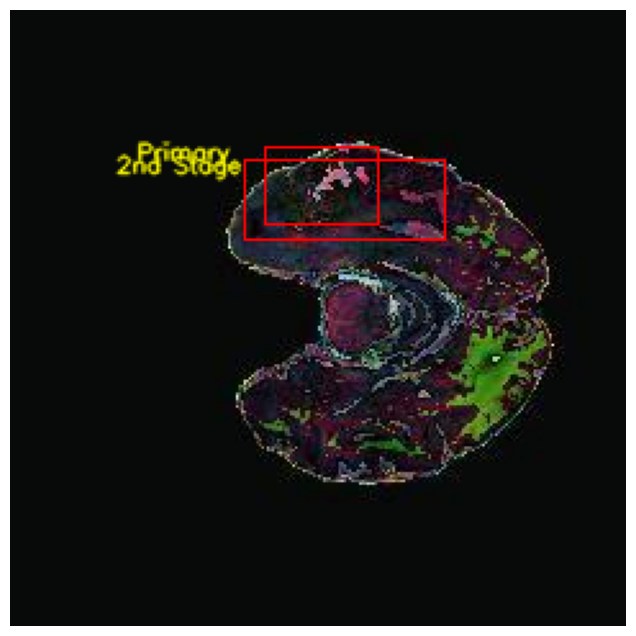

In [15]:
any_index_number = 5  # Change this number for different images
image_filename = pascal_voc.loc[any_index_number, 'filename']
test_df = pascal_voc[pascal_voc['filename']==pascal_voc.loc[any_index_number,'filename']].reset_index(drop=True)

if not os.path.isfile(os.path.join(path, image_filename)):
    print(f"Error: File '{image_filename}' does not exist at '{os.path.join(path, image_filename)}'")
else:
    test_img = cv2.cvtColor(cv2.imread(os.path.join(path, image_filename)), cv2.COLOR_BGR2RGB)

for i in range(len(test_df)):
    rec = cv2.rectangle(test_img, (test_df.loc[i,'xmin'],test_df.loc[i,'ymin']), (test_df.loc[i,'xmax'],test_df.loc[i,'ymax']), (255,0,0), 1, 1) 
    text = cv2.putText(rec, test_df.loc[i,'class'], (test_df.loc[i,'xmin']-50,test_df.loc[i,'ymin']+5), cv2.FONT_HERSHEY_SIMPLEX,.3, (255,255,0), 1, cv2.LINE_AA)
    
plt.figure(figsize=(8,8))    
plt.imshow(text)
plt.axis('off')
plt.show()

## Creating Custom Datasets

In [16]:
from torch.utils.data import Dataset
from PIL import Image

ModuleNotFoundError: No module named 'torch'

## Define the bulk of the dataset class

In [ ]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):      
        pass    
      
    def __len__(self):
        # return size of dataset
        return len(self.labels)
      
    def __getitem__(self, idx):
        pass

## Define the (__init__ )function

In [ ]:
def __init__(self, path2data, transform, trans_params):      

    # read and extract labels
    self.labels = df[["x_cen","y_cen"]].values

    # extract ID and imgName columns
    self.imgName=df["image_name"]
    self.ids=df.index

    self.fullPath2img=[0]*len(self.ids)
    for id_ in self.ids:
        image_filename = pascal_voc.loc[id_, 'filename']
        self.fullPath2img[id_-1]=os.path.join(path, image_filename)

    self.transform = transform
    self.trans_params=trans_params

##  Define the __getitem__ function

In [ ]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])  
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

##  Define the __getitem__ function

In [ ]:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [ ]:
trans_params_train={
    "target_size" : (240, 240),
    "p_hflip" : 0.0,
    "p_vflip" : 0.0,
    "p_shift" : 0.0,
    "max_translate": (0.0, 0.0),
    "p_brightness": 0.0,
    "brightness_factor": 0.0,
    "p_contrast": 0.0,
    "contrast_factor": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,    
}

In [ ]:
trans_params_val={
    "target_size" : (240, 240),
    "p_hflip" : 0.0,
    "p_vflip" : 0.0,
    "p_shift" : 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,    
}



In [ ]:
import random 
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])
    
    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])
        
    image=TF.to_tensor(image)
    return image, label

In [ ]:
amd_ds1=AMD_dataset(path,transformer,trans_params_train)
amd_ds2=AMD_dataset(path,transformer,trans_params_val)

In [ ]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

In [ ]:
from torch.utils.data import Subset

train_ds=Subset(amd_ds1,train_index)
print(len(train_ds))

val_ds=Subset(amd_ds2,val_index)
print(len(val_ds))

In [ ]:
print(train_ds)

In [ ]:
print(val_ds)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fix random seed
np.random.seed(0)

In [ ]:
def show(img,label=None):
    npimg = img.numpy().transpose((1,2,0))
    plt.imshow(npimg)
    if label is not None:
        label=rescale_label(label,img.shape[1:])        
        x,y=label
        plt.plot(x,y,'b+',markersize=20) 

In [ ]:
import torchvision.transforms.functional as TF


def resize_img_label(image,label=(0.,0.),target_size=(240,240)):
    w_orig,h_orig = image.size
    w_target,h_target = target_size
    cx, cy= label
    image_new = TF.resize(image,target_size)
    label_new= cx/w_orig*w_target, cy/h_orig*h_target
    return image_new,label_new

In [ ]:
def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

In [ ]:
def random_hflip(image,label):
    w,h=image.size
    x,y=label
    image = TF.hflip(image)
    label = w-x, y
    return image,label

In [ ]:
def random_vflip(image,label):
    w,h=image.size
    x,y=label
    image = TF.vflip(image)
    label = x, w-y
    return image, label


In [ ]:
def random_shift(image,label,max_translate=(0.2,0.2)):
    w,h=image.size
    max_t_w, max_t_h=max_translate
    cx, cy=label
    trans_coef=np.random.rand()*2-1
    w_t = int(trans_coef*max_t_w*w)
    h_t = int(trans_coef*max_t_h*h)
    image=TF.affine(image,translate=(w_t,h_t),shear=0,angle=0,scale=1)
    label = cx+w_t, cy+h_t
    return image,label


In [ ]:
plt.figure(figsize=(5,5))
for img,label in train_ds:
    show(img,label)
    break

In [ ]:
plt.figure(figsize=(5,5))
for img,label in val_ds:
    show(img,label)
    break

In [ ]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)  

In [ ]:
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(label_b)
    break

In [ ]:
import torch

# extract a batch from trainin data
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)

    # convert list to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

In [ ]:
for img_b, label_b in val_dl:
    print(img_b.shape,img_b.dtype)

    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

## Creating a model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()
    
    def forward(self, x):
        return x

In [ ]:
def __init__(self, params):
    super(Net, self).__init__()

    C_in,H_in,W_in=params["input_shape"]
    init_f=params["initial_filters"] 
    num_outputs=params["num_outputs"] 

    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=2,padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3,padding=1)
    #self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15 * init_f + C_in, 240, kernel_size=3, padding=1)
    self.fc1 = nn.Linear(240, num_outputs)

In [ ]:
def forward(self, x):
    identity=F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)
    
    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    x = F.relu(self.conv5(x))

    x=F.adaptive_avg_pool2d(x,1)
    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    return x    

In [ ]:
Net.__init__=__init__
Net.forward=forward

In [ ]:
params_model={
        "input_shape": (3,240,240),
        "initial_filters": 16, 
        "num_outputs": 2,
            }

model = Net(params_model)

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    model=model.to(device) 

In [ ]:
print(model)

## Defining Loss, Optimizer and IOU Metric

In [ ]:
loss_func = nn.SmoothL1Loss(reduction="sum")  

In [ ]:
n,c=8,2
y = 0.5 * torch.ones(n, c, requires_grad=True)
print(y.shape)

target = torch.zeros(n, c, requires_grad=False)
print(target.shape)

loss = loss_func(y, target)
print(loss.item())

y = 2 * torch.ones(n, c, requires_grad=True)
target = torch.zeros(n, c, requires_grad=False)
loss = loss_func(y, target)
print(loss.item())

In [ ]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [ ]:
for i in range(100):
    lr_scheduler.step(1)

In [ ]:
def cxcy2bbox(cxcy,w=40/240,h=40/240):
    # define two new tensors for w and h
    w_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
    h_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*h

    # extract cx and cy
    cx=cxcy[:,0].unsqueeze(1)
    cy=cxcy[:,1].unsqueeze(1)
    
    # concat cx,cy,w and h
    boxes=torch.cat((cx,cy, w_tensor, h_tensor), -1) # cx,cy,w,h
    
    return torch.cat((boxes[:, :2] - boxes[:, 2:]/2, # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:]/2), 1) # xmax, ymax

In [ ]:
torch.manual_seed(0)

cxcy=torch.rand(1,2)
print("center:", cxcy*240)

bb=cxcy2bbox(cxcy)
print("bounding box", bb*240)

In [ ]:
import torchvision
def metrics_batch(output, target):
    output=cxcy2bbox(output)
    target=cxcy2bbox(target)
    
    iou=torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [ ]:
import torch

# Check if CUDA (GPU) is available and choose the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n, c = 8, 2
target = torch.rand(n, c, device=device)
# Assuming cxcy2bbox and metrics_batch are defined functions
# You can use the 'device' variable in these functions as well
target = cxcy2bbox(target)
metrics_batch(target, target)


In [ ]:
def loss_batch(loss_func, output, target, opt=None):   
    # get loss 
    loss = loss_func(output, target)
    
    # get performance metric
    metric_b = metrics_batch(output,target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b



In [ ]:
for xb,label_b in train_dl:
    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    label_b=label_b.to(device)
 
    l,m=loss_batch(loss_func,label_b,label_b)
    print(l,m)
    break

## Training and Evaluation of the Model

In [ ]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # convert to tensor
        yb=torch.stack(yb,1)
        yb=yb.type(torch.float32).to(device)
        
        # get model output
        output=model(xb.to(device))
        
        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        
        # update running loss
        running_loss+=loss_b
        
        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

    # average loss value
    loss=running_loss/float(len_data)
    
    # average metric value
    metric=running_metric/float(len_data)
    
    return loss, metric

In [ ]:
import copy
def train_val(model, params):
    # extract parameters
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    # history of loss values in each epoch
    loss_history={
        "train": [],
        "val": [],
    }
    
    # histroy of metric values in each epoch
    metric_history={
        "train": [],
        "val": [],
    }    
    
    
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # initialize best loss to a large value
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        # get current learning rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        # train the model
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # evaluate the model
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
       
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            

        print("train loss: %.6f, accuracy: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, accuracy: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history    

In [ ]:
loss_func=nn.SmoothL1Loss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= path+"models"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs":100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights_smoothl1.pt",
}

# train and validate the model
model,loss_hist,metric_hist=train_val(model,params_train)

In [ ]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [ ]:
print("x-axis shape:", len(range(1, num_epochs + 1)))
print("train accuracy shape:", len(metric_hist["train"]))
print("validation accuracy shape:", len(metric_hist["val"]))

In [ ]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

## Deploying the mode

In [ ]:
params_model={
 "input_shape": (3,240,240),
 "initial_filters": 16,
 "num_outputs": 2,
 }
model = Net(params_model)
model.eval()
if torch.cuda.is_available():
    device = torch.device("cuda")
    model=model.to(device)
path2weights=path2models+"weights_smoothl1.pt"
model.load_state_dict(torch.load(path2weights))
loss_func=nn.SmoothL1Loss(reduction="sum")
with torch.no_grad():
    loss,metric=loss_epoch(model,loss_func,val_dl)
print(loss,metric)
    



In [ ]:
loss_func=nn.SmoothL1Loss(reduction="sum")
with torch.no_grad():
    loss,metric=loss_epoch(model,loss_func,val_dl)
print(loss,metric)

In [ ]:
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F
np.random.seed(0)
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
def show_tensor_2labels(img,label1,label2,w_h=(50,50)):
    label1=rescale_label(label1,img.shape[1:])
    label2=rescale_label(label2,img.shape[1:])
    img=tv_F.to_pil_image(img)
    w,h=w_h
    cx,cy=label1
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="green",width=2)
    cx,cy=label2
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="red",width=2)
    plt.imshow(np.asarray(img))


In [ ]:
rndInds=np.random.randint(len(val_ds),size=10)
print(rndInds)


In [ ]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.subplots_adjust(wspace=0.0, hspace=0.15)
for i,rndi in enumerate(rndInds):
    img,label=val_ds[rndi]
    h,w=img.shape[1:]
    with torch.no_grad():
        label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
    plt.subplot(2,3,i+1)
    show_tensor_2labels(img,label,label_pred)
 # calculate IOU
    label_bb=cxcy2bbox(torch.tensor(label).unsqueeze(0))
    label_pred_bb=cxcy2bbox(label_pred.unsqueeze(0))
    iou=torchvision.ops.box_iou(label_bb, label_pred_bb)
    plt.title("%.2f" %iou.item())
    if i>4:
        break

In [ ]:
def load_img_label(labels_df,id_):
        imgName=labels_df["image_name"]
        image_filename = labels_df.loc[id_, 'image_name']
        fullPath2img = os.path.join(path, image_filename)
        img = Image.open(fullPath2img)
        x=labels_df["x_cen"][id_]
        y=labels_df["y_cen"][id_]
        label=(x,y)
        return img,label

In [ ]:
def scale_label(a,b):
 div = [ai/bi for ai,bi in zip(a,b)]
 return div

In [ ]:

labels_df=df
img,label=load_img_label(labels_df,1)
print(img.size, label)
img,label=resize_img_label(img,label,target_size=(240,240))
print(img.size, label)
img=TF.to_tensor(img)
#label=scale_label(label,(240,240))
print(img.shape)
#print(img)
with torch.no_grad():
    label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
    show_tensor_2labels(img,label,label_pred)
#show(img, label_pred)  

In [ ]:
import time
elapsed_times=[]
with torch.no_grad():
    for k in range(100):
        start=time.time()
        label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
        elapsed=time.time()-start
        elapsed_times.append(elapsed)
print("inference time per image: %.4f s" %np.mean(elapsed_times))